# Nombre: Arturo Lazcano

In [111]:
# importacion de librerias útiles
from sklearn.datasets import load_iris
from scipy.stats import norm
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
iris = load_iris()
iris.data
#función auxiliar para extraer datos de Iris
def eje(data,i,e): # i=0,1,2,3 son las caracteristicas, e = especie:
    x=[] # 0=setosa, 1=versicolor, 2=virginica
    if e==0:
        for d in data[0:50]:
            x.append(d[i])
    elif e==1:
        for d in data[50:100]:
            x.append(d[i])
    elif e==2:
        for d in data[100:150]:
            x.append(d[i])
    else:
        print("input erróneo")
    return x

#función para calcular intervalos de confianza A(x),B(x) con alpha=0.35
def intConfianza(m,s): #alpha no es parámetro pues es fijo dando valores |Z1|,|Z2|= 0.9346
    #A=((m-0.9346)*s)/np.sqrt(50)
    A=m-((0.9346*s)/np.sqrt(50))
    B=m+((0.9346*s)/np.sqrt(50))
    #B=((m+0.9346)*s)/np.sqrt(50)
    return (A,B)

#datos para xij donde i=0,1,2,3 (largo sépalo, ancho sépalo, largo pétalo, ancho pétalo) y j=0,1,2
# (Setosa, Versicolor y Virginica)
x00=eje(iris.data,0,0)
x01=eje(iris.data,0,1)
x02=eje(iris.data,0,2)
x10=eje(iris.data,1,0)
x11=eje(iris.data,1,1)
x12=eje(iris.data,1,2)
x20=eje(iris.data,2,0)
x21=eje(iris.data,2,1)
x22=eje(iris.data,2,2)
x30=eje(iris.data,3,0)
x31=eje(iris.data,3,1)
x32=eje(iris.data,3,2)
#desviaciones estandar para cada atributo por especie
stdx00=np.std(x00)
stdx01=np.std(x01)
stdx02=np.std(x02)
stdx10=np.std(x10)
stdx11=np.std(x11)
stdx12=np.std(x12)
stdx20=np.std(x20)
stdx21=np.std(x21)
stdx22=np.std(x22)
stdx30=np.std(x30)
stdx31=np.std(x31)
stdx32=np.std(x32)
#promedios de cada set de datos
mx00=np.mean(x00)
mx01=np.mean(x01)
mx02=np.mean(x02)
mx10=np.mean(x10)
mx11=np.mean(x11)
mx12=np.mean(x12)
mx20=np.mean(x20)
mx21=np.mean(x21)
mx22=np.mean(x22)
mx30=np.mean(x30)
mx31=np.mean(x31)
mx32=np.mean(x32)

<IPython.core.display.Javascript object>


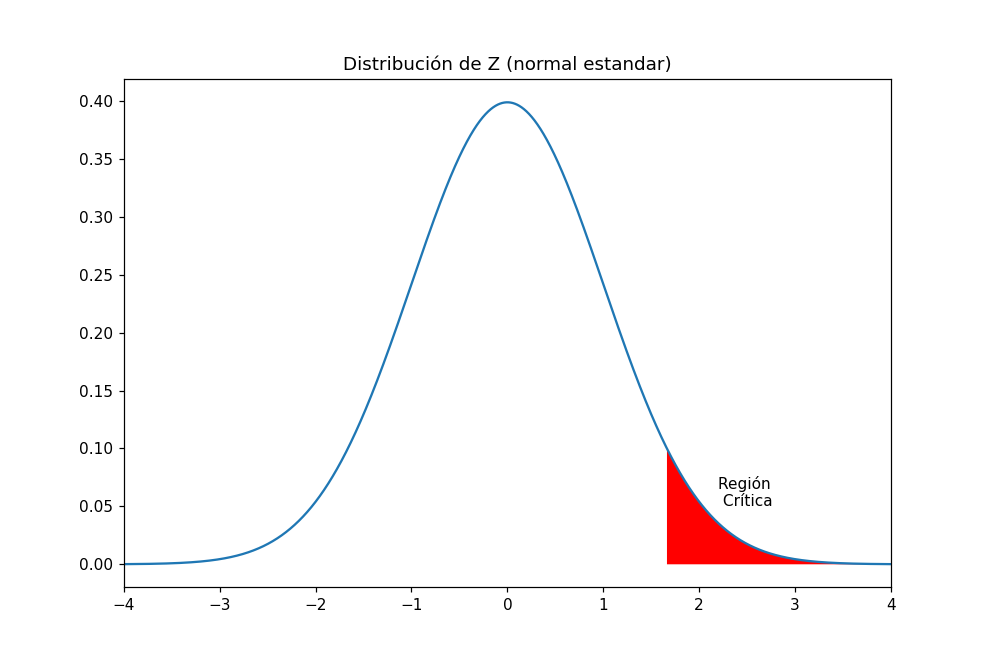

In [118]:
# creacion normal estandar con región crítica
mu = 100
sigma = 16
x1 = mu-sigma
x2 = mu+sigma
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma
x = np.arange(z1, z2, 0.001)
x_all = np.arange(-10, 10, 0.001) 
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x_all,y2)
ax.fill_between(x_all, y2, 0, where=(y2<=0.1)&(x_all>=0) ,facecolor='red')
ax.set_xlim([-4,4])
ax.set_title('Distribución de Z (normal estandar)')
plt.text(2.2, 0.05, 'Región \n Crítica')
plt.show()

<IPython.core.display.Javascript object>


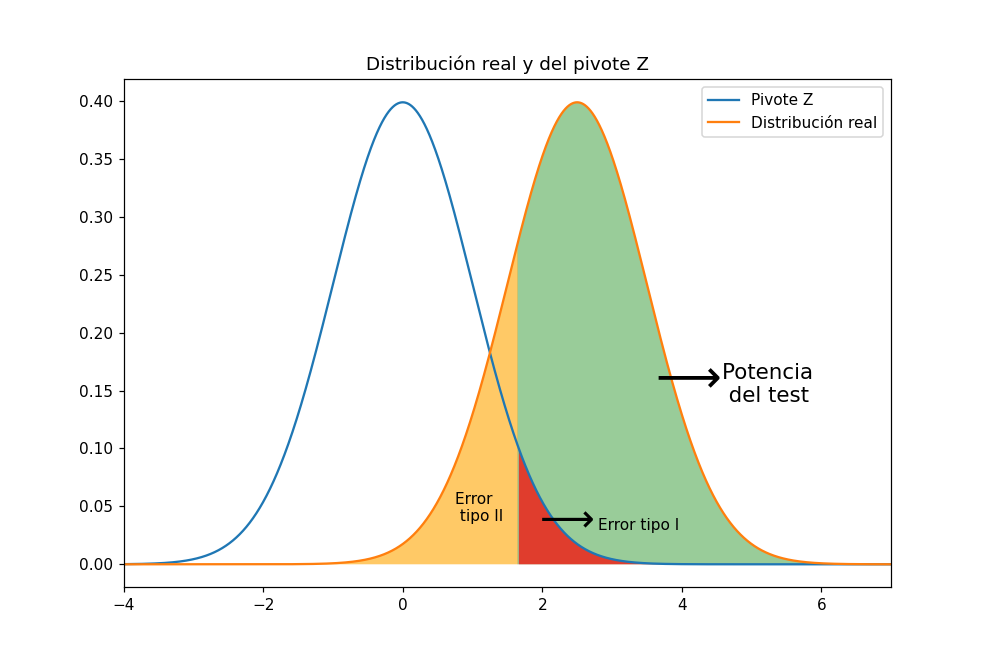

In [119]:
#comparacion de distribucion del pivote Z y datos reales con regiones críticas, errores y potencia
mu = 100
sigma = 4
mu2=110
x1 = 100
z1 = ( x1 - mu ) / sigma
z2 = ( x1 - mu2 ) / sigma
x = np.arange(z1, z2, 0.001)
x_all = np.arange(-10, 10, 0.001)
xalt = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)
y3=norm.pdf(x_all,2.5,1)
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x_all,y2,label="Pivote Z")
ax.plot(x_all,y3,label="Distribución real")
#norm.pdf(1.645)=0.1 aprox
ax.fill_between(x_all, y3, 0, where=(y3<=0.278)&(x_all<=2) ,alpha=0.6,facecolor='orange')
ax.fill_between(x_all, y3, 0, where=(x_all>=1.645) ,alpha=0.4,facecolor='green')
ax.fill_between(x_all, y2, 0, where=(y2<=0.1)&(x_all>=0) ,alpha=0.7,facecolor='red')
ax.set_xlim([-4,7])
ax.set_title('Distribución real y del pivote Z')
#plt.text(2, 0.08, 'Regiones \n Críticas')
plt.text(2.8, 0.03, 'Error tipo I')
plt.text(1.86, 0.03, r'$\longrightarrow$', fontsize=25)
plt.text(0.75, 0.037, 'Error \n tipo II')
plt.text(3.5, 0.15, r'$\longrightarrow$', fontsize=30)
plt.text(4.57, 0.14, 'Potencia \n del test', fontsize=14)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


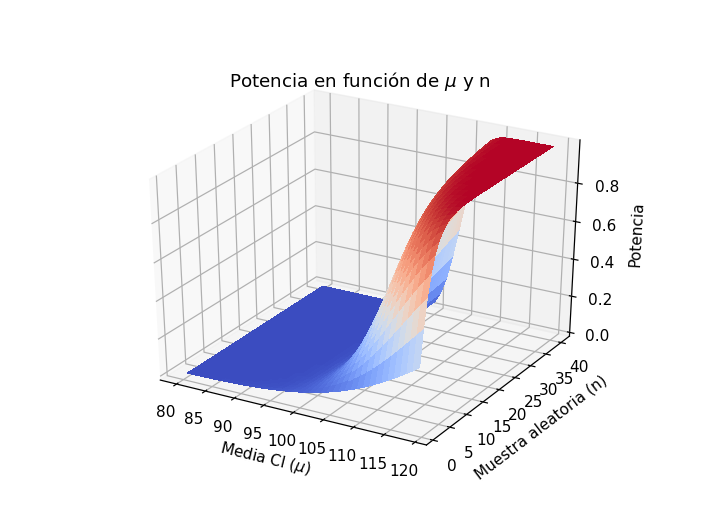

Text(0.5, 0.92, 'Potencia en función de $\\mu$ y n ')

In [120]:
#(d) gráfica potencia en función de mu y n
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
# X=mu e Y=n
X = np.arange(80, 120, 1)
Y = np.arange(1, 41, 1)
X, Y = np.meshgrid(X, Y)
Z = 1-norm.cdf(1.645-(((X-100)*np.sqrt(Y))/16))
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'Media CI ($\mu$)')
ax.set_ylabel('Muestra aleatoria (n)')
ax.set_zlabel('Potencia')
plt.title(r"Potencia en función de $\mu$ y n ")

<IPython.core.display.Javascript object>


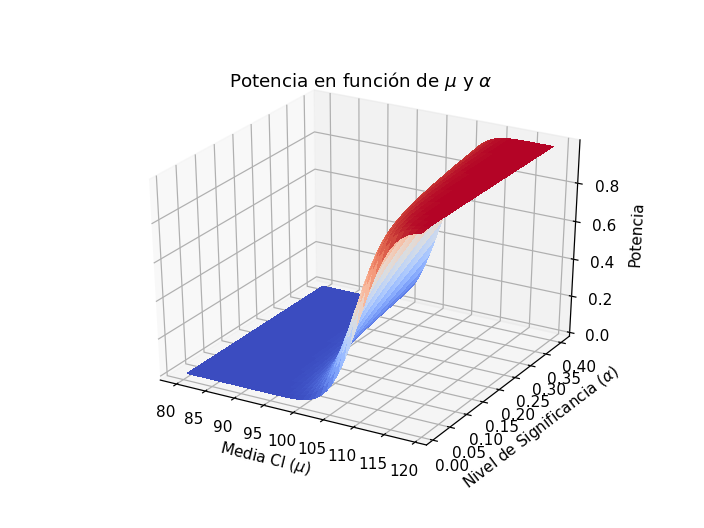

Text(0.5, 0.92, 'Potencia en función de $\\mu$ y $\\alpha$')

In [115]:
#(e) gráfica de potencia en función de mu y alpha
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
# X=mu e Y=alpha
X = np.arange(80, 120, 1)
Y = np.arange(0.01, 0.41, 0.01)
X, Y = np.meshgrid(X, Y)
R = norm.ppf(1-Y)
Z = 1-norm.cdf(R-((X-100)/4))
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'Media CI ($\mu$)')
ax.set_ylabel(r'Nivel de Significancia ($\alpha$)')
ax.set_zlabel('Potencia')
plt.title(r"Potencia en función de $\mu$ y $\alpha$")

<IPython.core.display.Javascript object>


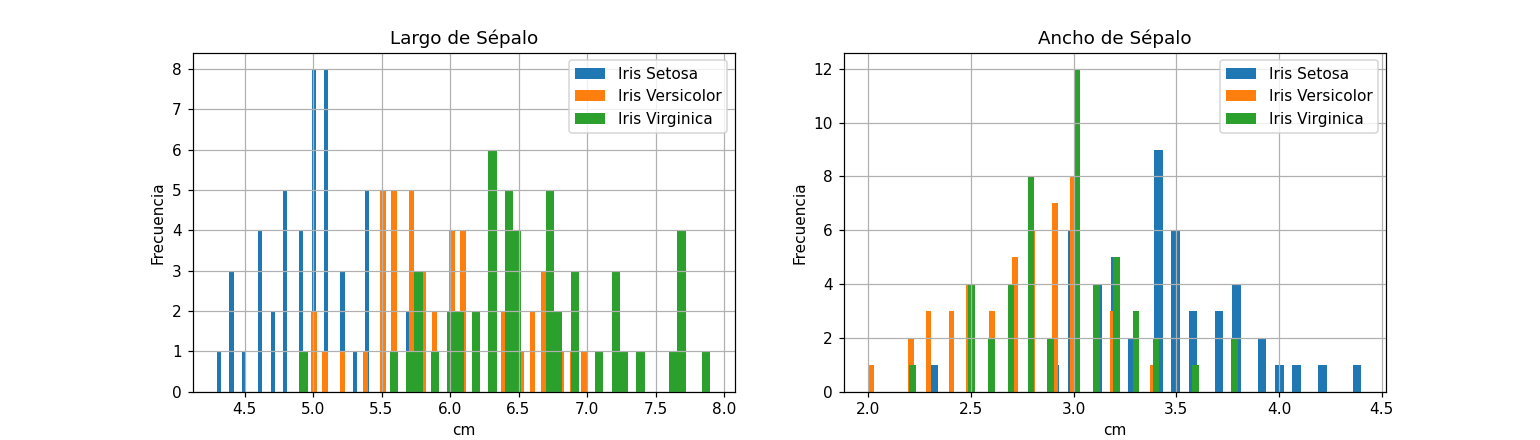

<IPython.core.display.Javascript object>


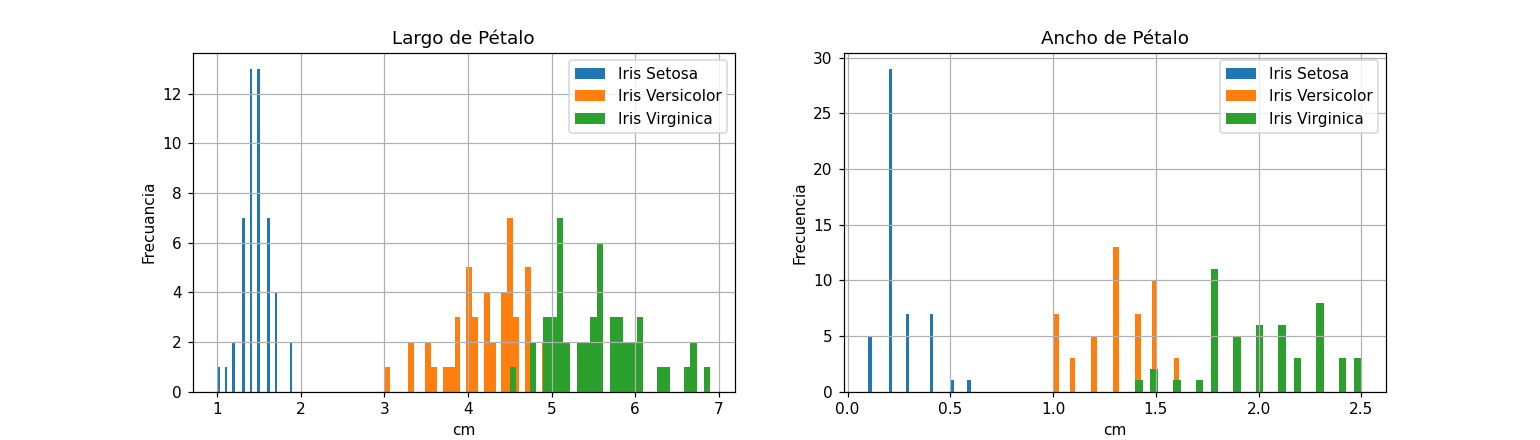

In [116]:
#P2
# cada especie tiene 50 muestras donde cada muestra contiene 4 atributos (caracteristicas)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.title('Largo de Sépalo')
plt.hist(x00, bins = 50, label="Iris Setosa")
plt.hist(x01, bins=50, label="Iris Versicolor")
plt.hist(x02, bins=50, label="Iris Virginica")
plt.xlabel("cm")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title('Ancho de Sépalo')
plt.hist(x10, bins = 50,label="Iris Setosa")
plt.hist(x11, bins=50,label="Iris Versicolor")
plt.hist(x12, bins=50,label="Iris Virginica")
plt.xlabel("cm")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
## graficos restantes
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.title('Largo de Pétalo')
plt.hist(x20, bins = 30,label="Iris Setosa")
plt.hist(x21, bins=30,label="Iris Versicolor")
plt.hist(x22, bins=30,label="Iris Virginica")
plt.xlabel("cm")
plt.ylabel("Frecuancia")
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title('Ancho de Pétalo')
plt.hist(x30, bins = 30,label="Iris Setosa")
plt.hist(x31, bins=30,label="Iris Versicolor")
plt.hist(x32, bins=30,label="Iris Virginica")
plt.xlabel("cm")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)

In [117]:
# 12 Intervalos de confianza:
print("Intervalos de confianza (A(x),B(x)) con 𝛼=0.35 \n")
print("Largo sépalo Iris Setosa: ",intConfianza(mx00,stdx00),"\n")
print("Largo sépalo Iris Versicolor: ",intConfianza(mx01,stdx01),"\n")
print("Largo sépalo Iris Virginica: ",intConfianza(mx02,stdx02),"\n")
print("Ancho sépalo Iris Setosa: ",intConfianza(mx10,stdx10),"\n")
print("Ancho sépalo Iris Versicolor: ",intConfianza(mx11,stdx11),"\n")
print("Ancho sépalo Iris Virginica: ",intConfianza(mx12,stdx12),"\n")
print("Largo pétalo Iris Setosa: ",intConfianza(mx20,stdx20),"\n")
print("Largo pétalo Iris Versicolor: ",intConfianza(mx21,stdx21),"\n")
print("Largo pétalo Iris Virginica: ",intConfianza(mx22,stdx22),"\n")
print("Ancho pétalo Iris Setosa: ",intConfianza(mx30,stdx30),"\n")
print("Ancho pétalo Iris Versicolor: ",intConfianza(mx31,stdx31),"\n")
print("Ancho pétalo Iris Virginica: ",intConfianza(mx32,stdx32),"\n")

Intervalos de confianza (A(x),B(x)) con 𝛼=0.35 

Largo sépalo Iris Setosa:  (4.959878839366244, 5.052121160633757) 

Largo sépalo Iris Versicolor:  (5.8684621024335755, 6.003537897566424) 

Largo sépalo Iris Virginica:  (6.504798970497599, 6.671201029502398) 

Ancho sépalo Iris Setosa:  (3.378401701689965, 3.477598298310035) 

Ancho sépalo Iris Versicolor:  (2.7289413721758757, 2.811058627824125) 

Ancho sépalo Iris Virginica:  (2.93180324987494, 3.0161967501250606) 

Largo pétalo Iris Setosa:  (1.439277108044547, 1.4847228919554534) 

Largo pétalo Iris Versicolor:  (4.198514968094015, 4.3214850319059845) 

Largo pétalo Iris Virginica:  (5.479787890440543, 5.624212109559458) 

Ancho pétalo Iris Setosa:  (0.23221092794315729, 0.25978907205684265) 

Ancho pétalo Iris Versicolor:  (1.3001252483374852, 1.3518747516625145) 

Ancho pétalo Iris Virginica:  (1.9900636881202762, 2.0619363118797245) 

